In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv('dataset\continuous_factory_process.csv')
data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [3]:
cleaned_data = data.dropna()
cleaned_data.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [4]:
#Features: Raw materials, process vars, combiner stage
features_columns = list(range(3, 39)) + list(range(39, 42))
features = cleaned_data.iloc[:, features_columns]

In [5]:
#Targets: Primary output measurements, setpoints
target_columns = list(range(42, 71))
targets = cleaned_data.iloc[:, target_columns]

In [6]:
features.head()
targets.head()

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement0.U.Setpoint,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement1.U.Setpoint,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement2.U.Setpoint,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement3.U.Setpoint,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement4.U.Setpoint,...,Stage1.Output.Measurement9.U.Setpoint,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual
0,12.72,13.75,0.0,22.74,12.16,13.02,21.97,21.88,0.00,32.55,...,19.52,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51
1,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
2,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
3,12.34,13.75,0.0,22.74,0.00,13.02,17.78,21.88,0.00,32.55,...,19.52,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00
4,12.29,13.75,0.0,22.74,0.00,13.02,17.83,21.88,31.44,32.55,...,19.52,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00


In [7]:
tolerance = 0.05
binary_labels = pd.DataFrame()

In [8]:
for i in range(0, targets.shape[1]-1, 2):
    actual = targets.iloc[:, i]
    setpoint = targets.iloc[:, i + 1]
    within_tolerance = (
        (actual - setpoint).abs()
        <=
        (tolerance * setpoint)).astype(int)
    binary_labels[f'Label_{i//2+1}'] = within_tolerance

In [9]:
target_labels = binary_labels.iloc[:, 0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target_labels, test_size=0.2, random_state=42)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_val_pred = log_model.predict(X_val_scaled)

In [25]:
y_pred = log_model.predict(X_test_scaled)

In [35]:
class_labels = ['out of tolerance', 'within tolerance']

In [38]:
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred, target_names=class_labels)

test_accuracy = accuracy_score(y_test, y_pred)
test_report = classification_report(y_test, y_pred, target_names=class_labels)

test_conf_matrix = confusion_matrix(y_test, y_pred)

In [39]:
print(val_report)

                  precision    recall  f1-score   support

out of tolerance       0.90      0.94      0.92      1820
within tolerance       0.70      0.55      0.62       434

        accuracy                           0.87      2254
       macro avg       0.80      0.75      0.77      2254
    weighted avg       0.86      0.87      0.86      2254



In [40]:
print(test_report)

                  precision    recall  f1-score   support

out of tolerance       0.91      0.94      0.92      2268
within tolerance       0.72      0.60      0.66       550

        accuracy                           0.88      2818
       macro avg       0.81      0.77      0.79      2818
    weighted avg       0.87      0.88      0.87      2818



In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)

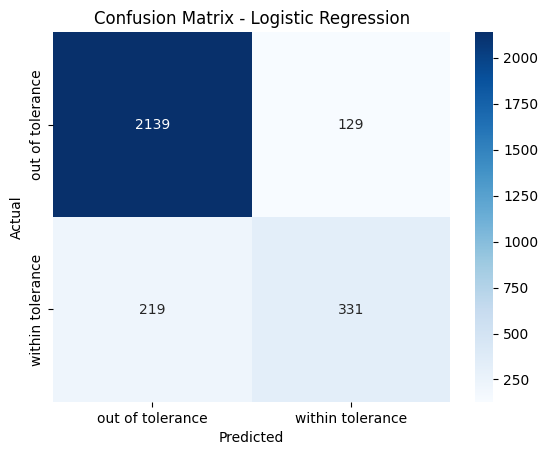

In [42]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()